# Sea Ice Extent Data Visualization

Motivation: This code was created to visualize three data sets together in order to see how the data sets compared to one another along with the tracking of sea ice extent in the Arctic region.

This code plots daily ice extent from several NSIDC data sets and can be used to quickly compare products and check for potential problems in the data set. The data sets used are:

**-MASIE (ID G02186)**

*Landing Page*: https://nsidc.org/data/g02186

*Data File Path*: ftp://sidads.colorado.edu/DATASETS/NOAA/G02186/masie_4km_allyears_extent_sqkm.csv

**-Sea Ice Index (ID G02135)**

*Landing Page*: https://nsidc.org/data/g02135

*Data File Path*: ftp://sidads.colorado.edu/DATASETS/NOAA/G02135/north/daily/data/N_seaice_extent_daily_v3.0.csv

**-Final Sea Ice CDR (G02202) and Near Real Time CDR (ID G10016)**

*Landing Page*: 

https://nsidc.org/data/g02202/

https://nsidc.org/data/g10016

*Data File Path*: 

ftp://sidads.colorado.edu/pub/DATASETS/NOAA/G02202_V3/north/daily/ 
 
ftp://sidads.colorado.edu/pub/DATASETS/NOAA/G10016/north/daily

Before starting: Ensure your working directory is set and that you have downloaded all data from the northern hemishpere for MASIE, Sea Ice Index, and Near Real Time CDR. Additional code will need to be ran in order to reformat the Near Real Time CDR data set. This code package will be linked here.  


# Importing Necessary Python Packages

Starting with this box, we will establish packages required to run this code and the directory in which data will be pulled from. For me, I prefer keeping all data sets in the downloads folder for easy access, however, you can change this directory to any location as long as you keep ALL datasets there and you ensure the directory is set to that location.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import urllib.request 
import calendar
from pandas.plotting import register_matplotlib_converters
import datetime as datetime
register_matplotlib_converters()
 
%matplotlib inline 

#print os.getcwd()  # Prints the current working directory
os.chdir("/Users/misi7940/Downloads/") #Currently set for my directory, will be changed for yours



# Set Start and End Date

The cell below allows you to set the start and end date desired for plotting. This will be used throughout for all the data sets. The last date will NOT be included in the graph, so make sure to add one day to your target date range. ex: I want to look at all of 2018, so my date range will be 1/1/2018 through 1/1/2019. In this specific dataset, you do not need a 10 digit day, using 1/1/2018 is the correct format for the MASIE_date_range variable.

In [2]:
# Set the start and end date variables
start_date = '1/1/2017'
end_date = '2/20/2020'

# Extract MASIE Data

## Clean MASIE Data

The following code extracts the data we are interested in from the MASIE data set. We are interested in the full northern hemisphere, so we tell python to "drop" the data points that would not fall into that category. If you want to look at a specific region, add or remove it from the "drop" formula.

In [3]:
#Read MASIE csv file into notebook

masie_df=pd.read_csv("masie_4km_allyears_extent_sqkm-5.csv", skiprows=[0])

#Convert MASIE date column into datetime object
#Drop unnecessary location data from MASIE data that was read into notebook
masie_clean_df = masie_df.drop([' (1) Beaufort_Sea', ' (2) Chukchi_Sea', 
' (3) East_Siberian_Sea',' (4) Laptev_Sea',' (5) Kara_Sea',' (6) Barents_Sea',
' (7) Greenland_Sea',' (8) Baffin_Bay_Gulf_of_St._Lawrence',' (9) Canadian_Archipelago',
' (10) Hudson_Bay',' (11) Central_Arctic',' (12) Bering_Sea',' (13) Baltic_Sea',' (14) Sea_of_Okhotsk',
' (15) Yellow_Sea',' (16) Cook_Inlet'], axis=1)

# Rename the extent column to extent for easier use
masie_clean_df.rename(columns = {' (0) Northern_Hemisphere':'extent'}, inplace = True)

# Converting MASIE date format

This code adds an additional column into the MASIE dataset that will be in format mmddyyyy. By not overwriting the previous date column we are able to validate the new column is correctly generating dates.

In [4]:
# Convert the MASIE yyyyddd date format to a mmddyyy date format
# Create an empty list to hold the mm/dd/yyyy date format
mmddyyyy = []

# Loop through the dataframe and convert the yyyyddd format to mmddyyyy and append to list
for x in masie_clean_df['yyyyddd']:
    mmddyyyy.append(datetime.datetime.strptime(str(x), '%Y%j').strftime('%m/%d/%Y'))

# Add list as a column to data frame
masie_clean_df['mmddyyyy'] = mmddyyyy

# Convert string date to a datetime object
masie_clean_df['mmddyyyy'] = pd.to_datetime(masie_clean_df['mmddyyyy'], infer_datetime_format=True)

# Create clip_MASIE 


The function, clip_MASIE, allows you to specify a date range to analyze from the dates set in the Set Start and End Date section at the top of the notebook

In [5]:
def clip_MASIE(start,end):
    '''
 Allows you to specify a date range to analyze
 Parameters
 ----------
 start : The start date as a string of the form mm/dd/yyyy
 end: The end date as a string of the form mm/dd/yyyy
 Returns
 ----------
 masie_clip: Returns a pandas data frame with the masie date clipped by the start and end dates specified.
 '''
    masie_clip=masie_clean_df.loc[(masie_clean_df['mmddyyyy'] >= start) & (masie_clean_df['mmddyyyy'] < end)]
    return masie_clip

MASIE_date_range=clip_MASIE(start_date, end_date)

#Uncomment next line to verify all dates have been read in correctly
#print(MASIE_date_range)

# Plot MASIE Data

This code allows us to make the graphs of the functions from above

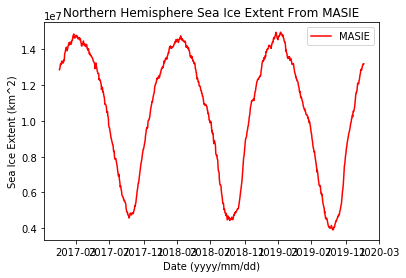

In [6]:
plt.plot(MASIE_date_range['mmddyyyy'],MASIE_date_range['extent'],color='red',label="MASIE")
plt.xlabel("Date (yyyy/mm/dd)")
plt.ylabel("Sea Ice Extent (km^2)")
plt.title("Northern Hemisphere Sea Ice Extent From MASIE")
plt.legend()
plt.show()

#Uncomment below to save figure with unique name and file type
#plt.savefig("Figurename.filetype")


# Sea Ice Index Data

This block of code is reading in the Sea Ice Index dataset. This code is a repetition of the MASIE code with small modifications. Again, the drop function is cleaning up our dataset before we start to visualize it. In this dataset, the dat of interest is in the format yyyy-mm-dd. This is a different format than the MASIE data so be careful when entering your date range because if it is not in this format, the code will not run. You will need to update the SI_date_range and SI_ice_exent variables with the date you want.

# Combine Year, Month, Day Columns and Reformat Data

In [7]:
parse_dates=[['Year',' Month',' Day']]
seaice_df=pd.read_csv("N_seaice_extent_daily_v3.0.csv",skiprows=[1],parse_dates=parse_dates)
seaice_clean_df = seaice_df.drop(['    Missing',' Source Data'], axis=1)

# Create and Plot Sea Ice Index Funtions

These functions are reappropriated from the MASIE data set 

In [8]:
def clip_SII(start,end):
    '''
 Allows you to specify a date range to analyze
 Parameters
 ----------
 start : The start date as a string of the form mm/dd/yyyy
 end: The end date as a string of the form mm/dd/yyyy
 Returns
 ----------
 seaice_clip: Returns a pandas data frame with the masie date clipped by the start and end dates specified.
 '''
    seaice_clip=seaice_clean_df.loc[(seaice_clean_df['Year_ Month_ Day'] >= start) & (seaice_clean_df['Year_ Month_ Day'] < end)]
    return seaice_clip

SII_date_range=clip_SII(start_date, end_date)

#Change column names
SII_date_range.columns=['year_month_day','extent']

#Uncomment next line to verify all dates have been read in correctly
#print(SI_date_range)

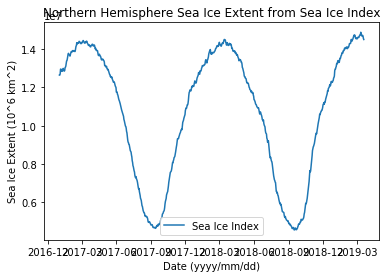

In [9]:
#Plot functions
plt.plot(SII_date_range['year_month_day'],SII_date_range['extent']*(10**6), label='Sea Ice Index')

plt.xlabel("Date (yyyy/mm/dd)")
plt.ylabel("Sea Ice Extent (10^6 km^2)")
plt.title("Northern Hemisphere Sea Ice Extent from Sea Ice Index")
plt.legend()
plt.show()

# Near Real Time Climate Data Record 

Finally we will incorporate the two Climate Data Records (CDRs) for sea ice. These data sets have been reduced into a CSV file by separate code so the dates and values are already cleaned up and ready for visualization. That code is part of this repository and is called CDR_Reformatting.ipynb. Because we have two data sets for CDR data, we will need to import both separately before using them. You will need to download all of the .nc files and run the CDR_Reforamtting notebook before continuing. The code below will allow for either or both data sets to be used. You must change the date range of interest throughout the notebook to ensure correct date ranges are being used. For example, in this line of code, we are looking in 2018 data. For the next box of code, we will look at the 2019 data.

# Create and Plot 2018 NRT CDR Functions
This code block importsNRT CDR data from the **2018** data set

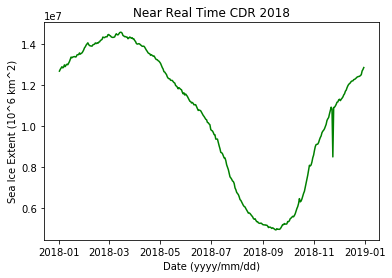

In [10]:
#Read in csv file and extract date data
cdr18= pd.read_csv("index2018.csv",parse_dates=True, nrows=365)
cdr18['yyyymmdd'] = pd.to_datetime(cdr18['yyyymmdd'], infer_datetime_format=True)

#################################################################################################################################
def clip_cdr18(start,end):
    '''
 Allows you to specify a date range to analyze
 Parameters
 ----------
 start : The start date as a string of the form mm/dd/yyyy
 end: The end date as a string of the form mm/dd/yyyy
 Returns
 ----------
 cdr18_clip: Returns a pandas data frame with the masie date clipped by the start and end dates specified.
 '''
    cdr18_clip=cdr18.loc[(cdr18['yyyymmdd'] >= start) & (cdr18['yyyymmdd'] < end)]
    return cdr18_clip

cdr18_date_range=clip_cdr18(start_date, end_date)

#Uncomment next line to verify all dates have been read in correctly
#print(cdr18_date_range)

###################################################################################################################################

#Plot functions
plt.plot(cdr18_date_range['yyyymmdd'],cdr18_date_range['extent'],color='green', label='NRT CDR 2018')
plt.xlabel("Date (yyyy/mm/dd)")
plt.ylabel("Sea Ice Extent (10^6 km^2)")
plt.title("Near Real Time CDR 2018")
plt.show()

# Create and Plot 2019 NRT CDR Functions

The following will import the **2019** CDR data set. 

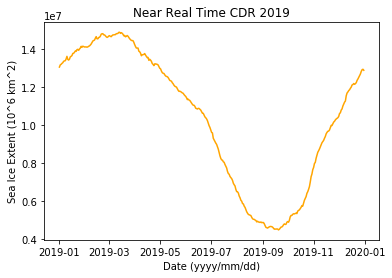

In [11]:
#Import and extract data
cdr19=pd.read_csv("index2019.csv",parse_dates=True, nrows=365)
cdr19['yyyymmdd'] = pd.to_datetime(cdr19['yyyymmdd'], infer_datetime_format=True)

#################################################################################################################################
#Read in csv file and extract date data
cdr18= pd.read_csv("index2019.csv",parse_dates=True, nrows=365)
cdr18['yyyymmdd'] = pd.to_datetime(cdr18['yyyymmdd'], infer_datetime_format=True)

#################################################################################################################################
def clip_cdr19(start,end):
    '''
 Allows you to specify a date range to analyze
 Parameters
 ----------
 start : The start date as a string of the form mm/dd/yyyy
 end: The end date as a string of the form mm/dd/yyyy
 Returns
 ----------
 cdr19_clip: Returns a pandas data frame with the masie date clipped by the start and end dates specified.
 '''
    cdr19_clip=cdr19.loc[(cdr19['yyyymmdd'] >= start) & (cdr19['yyyymmdd'] < end)]
    return cdr19_clip

cdr19_date_range=clip_cdr19(start_date, end_date)

#Uncomment next line to verify all dates have been read in correctly
#print(cdr19_date_range)

#################################################################################################################################
#Plot functions

plt.plot(cdr19_date_range['yyyymmdd'],cdr19_date_range['extent'],color='orange', label='NRT CDR 2019')
plt.xlabel("Date (yyyy/mm/dd)")
plt.ylabel("Sea Ice Extent (10^6 km^2)")
plt.title("Near Real Time CDR 2019")
plt.show()

# Create and Plot 2020 NRT CDR Functions
The following will import the **2020** CDR data set. This data set is currently being updated daily, because of that, make sure to only specify dates which you have downloaded into the csv file this code pulls from. For example, my data set is only valid until 2/26/2020, if I were to ask the code to plot up through August, there would be no data available and therefore cause an error within the code.

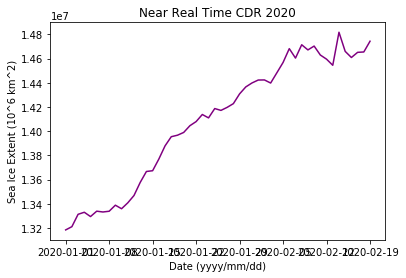

In [12]:
os.chdir("/Users/misi7940/Desktop/2020/2020")
#Import and extract data
cdr20=pd.read_csv("index2020.csv",parse_dates=True, nrows=365)
cdr20['yyyymmdd'] = pd.to_datetime(cdr20['yyyymmdd'], infer_datetime_format=True)

#################################################################################################################################
#Read in csv file and extract date data
cdr20= pd.read_csv("index2020.csv",parse_dates=True, nrows=365)
cdr20['yyyymmdd'] = pd.to_datetime(cdr20['yyyymmdd'], infer_datetime_format=True)

#################################################################################################################################
def clip_cdr20(start,end):
    '''
 Allows you to specify a date range to analyze
 Parameters
 ----------
 start : The start date as a string of the form mm/dd/yyyy
 end: The end date as a string of the form mm/dd/yyyy
 Returns
 ----------
 cdr20_clip: Returns a pandas data frame with the masie date clipped by the start and end dates specified.
 '''
    cdr20_clip=cdr20.loc[(cdr19['yyyymmdd'] >= start) & (cdr20['yyyymmdd'] < end)]
    return cdr20_clip

cdr20_date_range=clip_cdr20(start_date, end_date)

#Uncomment next line to verify all dates have been read in correctly
#print(cdr20_date_range)

#################################################################################################################################
#Plot functions

plt.plot(cdr20_date_range['yyyymmdd'],cdr20_date_range['extent'],color='purple', label='NRT CDR 2020')
plt.xlabel("Date (yyyy/mm/dd)")
plt.ylabel("Sea Ice Extent (10^6 km^2)")
plt.title("Near Real Time CDR 2020")
plt.show()

# Plotting All Graphs Together
To plot any of these graphs together, you need to combine all code into a single box. I will add this below. When using one year vs the other, uncomment which data set you are looking at. You can comment and uncomment which ever data sets you would like to display below. Warning: When you edit a date range from an above box, make sure to run ALL boxes again to update the stored information or the graphs will not plot.

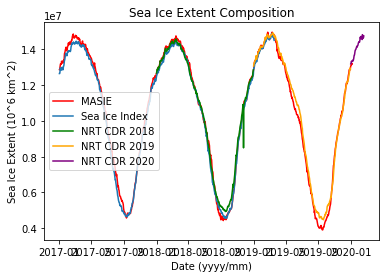

In [13]:
#Use this code to plot MASIE 
plt.plot(MASIE_date_range['mmddyyyy'],MASIE_date_range['extent'],color='red',label="MASIE")

#Use this code to plot Sea Ice Index
plt.plot(SII_date_range['year_month_day'],SII_date_range['extent']*(10**6), label='Sea Ice Index')

#Use this code for 2018 
plt.plot(cdr18_date_range['yyyymmdd'],cdr18_date_range['extent'],color='green', label='NRT CDR 2018')

#use this code for 2019
plt.plot(cdr19_date_range['yyyymmdd'],cdr19_date_range['extent'],color='orange', label='NRT CDR 2019')

#use this code for 2020
plt.plot(cdr20_date_range['yyyymmdd'],cdr20_date_range['extent'],color='purple', label='NRT CDR 2020')

plt.legend()
plt.xlabel("Date (yyyy/mm)")
plt.ylabel("Sea Ice Extent (10^6 km^2)")
plt.title("Sea Ice Extent Composition")
plt.show()
